In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import deepchem as dc
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

%matplotlib inline

### Load data set 

Hansen et al (2013) state that the best performing neural networks used up to 1000 samples of randomized coulomb matrices. In this notebook, we will compare performance of randomized and eigenvector representations of the coulomb matrices. 

In [2]:
dataset_file = "raw_data/gdb7.sdf"
featurizer = dc.feat.CoulombMatrixEig(23, remove_hydrogens=False)

data_loader = dc.data.SDFLoader(
      tasks=["u0_atom"], smiles_field="smiles",
      featurizer=featurizer,
      mol_field="mol")

dataset = data_loader.featurize(dataset_file)


Loading raw samples now.
shard_size: 8192
Reading structures from raw_data/gdb7.sdf.
Currently featurizing feature_type: CoulombMatrixEig
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
TIMING: featurizing shard 0 took 4.994 s
TIMING: dataset construction took 6.675 s
Loading dataset from disk.


Hansen et al (2013) state that normalisation scaling of inputs is detrimental to model performance as the input dimensions are related. 
In this notebook, we will compare the performance of scaled and non-scaled inputs. 



In [3]:
# Split dataset
random_splitter = dc.splits.RandomSplitter()
stratified_splitter = dc.splits.SingletaskStratifiedSplitter(task_number=0)

train_dataset, valid_dataset, test_dataset = stratified_splitter.train_valid_test_split(dataset)

# Normalisation transformer 
transformer = dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset, move_mean=True)

train_trans = transformer.transform(train_dataset)
valid_trans = transformer.transform(valid_dataset)
test_trans = transformer.transform(test_dataset)

TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.022 s
Loading dataset from disk.
TIMING: dataset construction took 0.022 s
Loading dataset from disk.
TIMING: dataset construction took 0.081 s
Loading dataset from disk.
TIMING: dataset construction took 0.011 s
Loading dataset from disk.
TIMING: dataset construction took 0.012 s
Loading dataset from disk.


/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)
/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


In [4]:
train_trans.X[0]

array([-1.1287813 , -3.05978422, -6.22205544, -6.65711348, -7.33270973,
       -5.25251403, -2.29123807, -3.0189293 , -6.79902732, -5.37412628,
       -4.12728235, -3.41551292, -2.42245146, -1.72059712, -1.34442576,
       -0.95400199, -0.76133265, -0.524023  , -0.39448157, -0.2532013 ,
       -0.15268819, -0.0725181 ,  0.        ])

In [5]:
print(train_dataset.get_shape())
print(valid_dataset.get_shape())
print(test_dataset.get_shape())

((5728, 23), (5728, 1), (5728, 1), (5728,))
((716, 23), (716, 1), (716, 1), (716,))
((716, 23), (716, 1), (716, 1), (716,))


RDKit ERROR: [21:46:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 3 

train ((5728, 23), (5728, 1), (5728, 1), (5728,))


RDKit ERROR: [21:46:28] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:28] Explicit valence for atom # 4 

RDKit ERROR: [21:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 3 

valid ((716, 23), (716, 1), (716, 1), (716,))
test ((716, 23), (716, 1), (716, 1), (716,))


RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:46:29] Explicit valence for atom # 2 

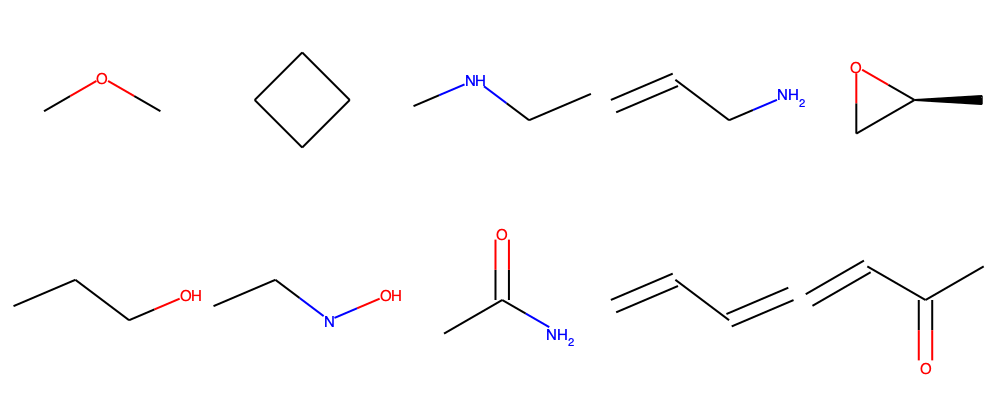

In [6]:
## Dataset analysis

for name,data in zip(['train', 'valid', 'test'],[train_dataset, valid_dataset, test_dataset]):
    print(name, data.get_shape())
    #print(name, data.get_statistics(X_stats=True))
    mol_list = [Chem.MolFromSmiles(id_) for id_ in data.ids]
    #SVG(moltosvg(mol_list[0]))
    
Chem.Draw.MolsToGridImage(mol_list[:10], molsPerRow=5)

## Keras Neural Networks

In [7]:
## Functions

def plot_history(history, title):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    #fig, ax = plt.subplots(1,2, figsize=(12,6))
    plt.figure(figsize=(8,6))
   # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train MSE')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Valid MSE')
#     plt.plot(hist['epoch'], hist['val_loss'],
#            label = 'Val Loss')
    plt.title(title)
    plt.legend()
    #plt.ylim([0,5])
    #ax[0].legend()
    plt.show()

In [9]:
## Keras implementation 
from tensorflow import keras

# Initializer
# Initialise weights according to Hansen et al (2013)
init_1 = keras.initializers.RandomNormal(mean=0, stddev=(1/np.sqrt(400)))
init_2 = keras.initializers.RandomNormal(mean=0, stddev=(1/np.sqrt(100)))

# Network

model = tf.keras.Sequential([
keras.layers.Dense(400, input_shape=(23,), kernel_initializer=init_1, activation='sigmoid'),
keras.layers.Dense(100, kernel_initializer=init_2, activation='sigmoid'),
keras.layers.Dense(1)])

# Optimizer
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Configure a model for mean-squared error regression.
model.compile(optimizer=sgd,
              loss='mae',       # mean squared error
              metrics=['mae', 'mse'])  # mean absolute error

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# Save model weights checkpoint
model_checkpoint = keras.callbacks.ModelCheckpoint('sgd_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min')

# Train on Eigenvector dataset

X_train = train_trans.X
y_train = train_trans.y

# Validate on Eigenvector dataset

X_valid = valid_trans.X
y_valid = valid_trans.y

# Test on Eigenvector dataset

X_test = test_trans.X
y_test = test_trans.y

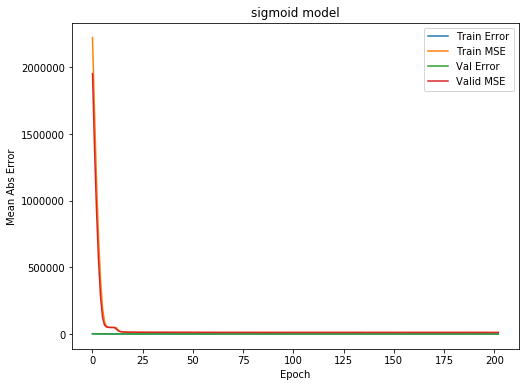

In [91]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=500, 
                    callbacks=[early_stop], batch_size=25, verbose=0)

plot_history(history, "sigmoid model")

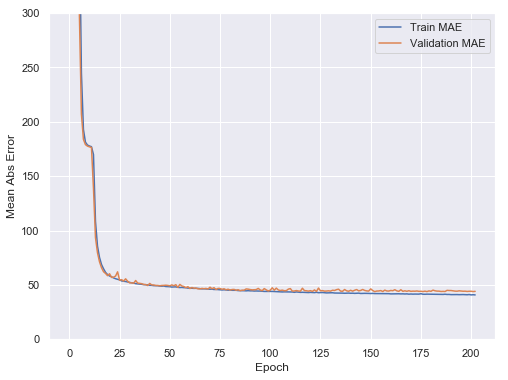

In [97]:
sns.set()

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.figure(figsize=(8,6))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.ylim(0,300)
plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train MAE')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label='Validation MAE')
plt.legend()
plt.show()

In [104]:
history.history

{'loss': [1473.56529662063,
  1272.9429955509122,
  1050.8115997740676,
  823.9023792117667,
  596.9414155043703,
  386.5555967751828,
  244.85363345971987,
  193.00201250720957,
  181.35357003238613,
  178.68561216439616,
  177.7757313691038,
  177.16824960309035,
  169.92652232686902,
  108.456876849329,
  85.6940224696804,
  75.29537339516858,
  68.79580358020421,
  64.90755105884382,
  61.59669383045016,
  59.548589456680766,
  58.22102400810359,
  57.534870801691234,
  56.45248759525448,
  55.72360466112637,
  55.150928670134626,
  54.66716196683532,
  53.698026571193886,
  53.42700320865189,
  53.14649567557447,
  52.73167529685537,
  52.36900658264506,
  51.94741073050979,
  51.7442930868551,
  51.19706789341719,
  51.00530067560726,
  50.86226655051695,
  50.57917611425815,
  50.26488673620384,
  50.150276048889374,
  50.06205108512047,
  49.69607111528599,
  49.639404531630724,
  49.35183131328508,
  49.279346067978686,
  49.24365996531934,
  48.90639247175036,
  48.8372538176

In [100]:
## Model save

model.save("keras_from_mat_eigenspectrum_23072019.h5")

shape X_test:  (716, 23)
shape y_test:  (716, 1)
716/716 [==============================] - 0s 44us/sample - loss: 47.9841 - mean_absolute_error: 47.9841 - mean_squared_error: 13014.2100


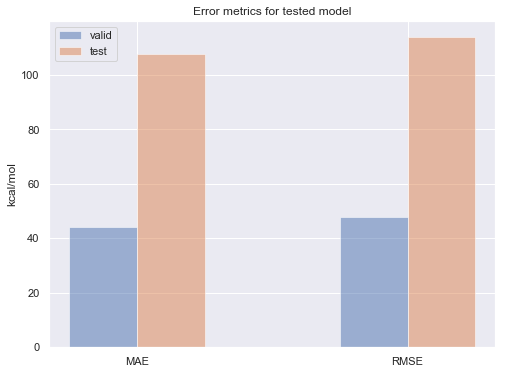

/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


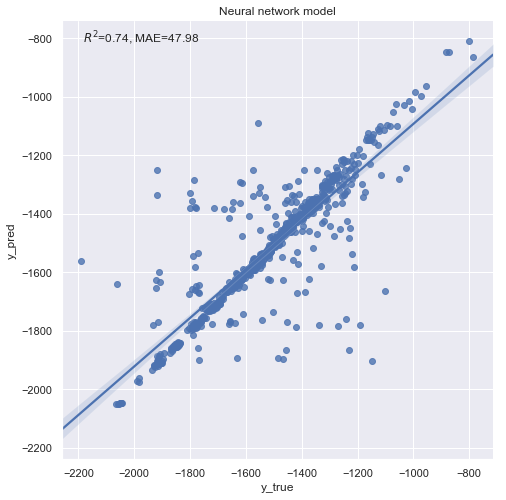

In [109]:
## Test

from sklearn import metrics 


print("shape X_test: ", X_test.shape)
print("shape y_test: ", y_test.shape)

predictions = model.predict(X_test)
scores = model.evaluate(X_test, y_test)
keras_errors = {}

keras_errors['test'] = {'mae': metrics.mean_absolute_error(y_test, predictions), 
                        'rmse': np.sqrt(metrics.mean_squared_error(y_test, predictions))}

keras_errors['valid'] = {'mae': history.history['val_mean_absolute_error'][-1:].pop(), 
                         'rmse': np.sqrt(history.history['val_mean_squared_error'][-1:].pop())}



pos = list(range(len(keras_errors)))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos,[keras_errors['valid']['mae'], keras_errors['test']['mae']],width,alpha=0.5, label='mae')
plt.bar([p + 1*width for p in pos], [[keras_errors['valid']['rmse']], keras_errors['test']['rmse']], width, 
        alpha=0.5, label='mse')

ax.set_title('Error metrics for tested model')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['MAE', 'RMSE'])
ax.set_ylabel('kcal/mol')

plt.legend(['valid', 'test'], loc='upper left')
plt.show()                     
                         

results = pd.DataFrame(predictions, columns = ['y_pred'])
results['y_true'] = y_test
sns.pairplot(results, x_vars='y_true', y_vars='y_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_test, predictions), 
                                       metrics.mean_absolute_error(y_test, predictions)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()


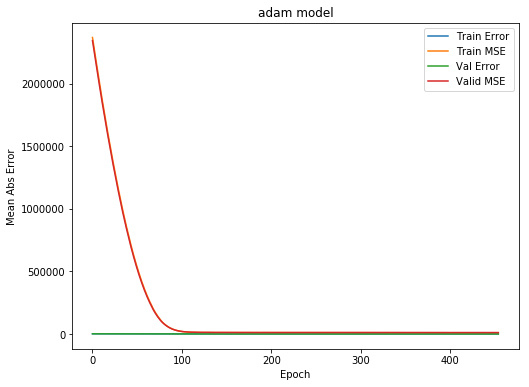

In [93]:
# Configure a model for mean-squared error regression.
model_adam = tf.keras.Sequential([
keras.layers.Dense(400, activation='sigmoid', input_shape=(23,), kernel_initializer=init_1),
keras.layers.Dense(100, activation='sigmoid', kernel_initializer=init_2),
#keras.layers.Dense(100, activation='sigmoid'),
keras.layers.Dense(1)])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint('adam_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min')

model_adam.compile(optimizer='adam',
              loss='mae',       # mean squared error
              metrics=['mae', 'mse'])  # mean absolute error

history_adam = model_adam.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=2000, 
                    callbacks=[early_stop, model_checkpoint], batch_size=25, verbose=0)

plot_history(history_adam, "adam model")

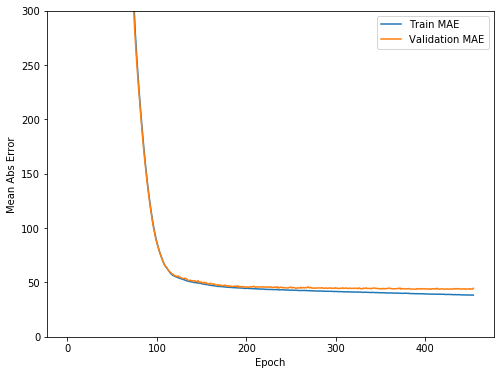

In [94]:
hist_adam = pd.DataFrame(history_adam.history)
hist_adam['epoch'] = history_adam.epoch

#fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.figure(figsize=(8,6))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.ylim(0,300)
plt.plot(hist_adam['epoch'], hist_adam['mean_absolute_error'],
           label='Train MAE')
plt.plot(hist_adam['epoch'], hist_adam['val_mean_absolute_error'],
           label='Validation MAE')
plt.legend()
plt.show()

## Kernel Ridge Regression Models

In [22]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics

regressor = KernelRidge(kernel='laplacian', alpha=0.0001, gamma=0.0001)

krr_model = regressor.fit(X_train, y_train)



In [23]:
## Validate model 

valid = krr_model.predict(X_valid)
test = krr_model.predict(X_test)
results = pd.DataFrame(valid, columns = ['valid_pred'])
results['test_pred'] = test
results['y_valid'] = y_valid
results['y_test'] = y_test

krr_errors = {}

krr_errors['valid'] = {'mae': metrics.mean_absolute_error(y_valid, valid), 
                   'mse': np.sqrt(metrics.mean_squared_error(y_valid, valid)), 
                  'r2': metrics.r2_score(y_valid, valid)}
krr_errors['test'] = {'mae': metrics.mean_absolute_error(y_test, test), 
                   'mse': np.sqrt(metrics.mean_squared_error(y_test, test)),
                 'r2': metrics.r2_score(y_test, test)}

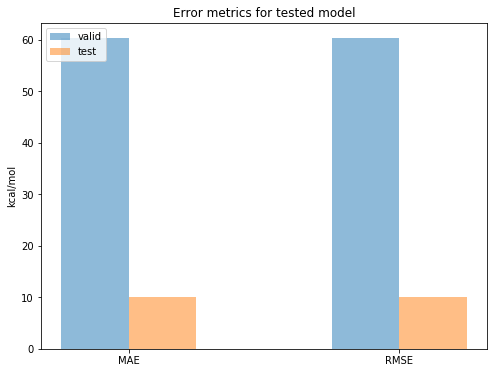

/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


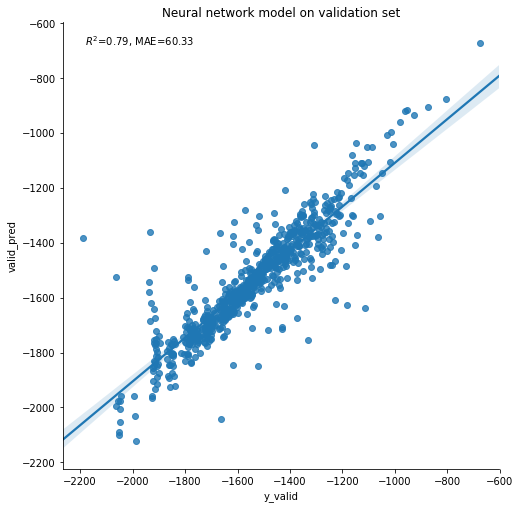

/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


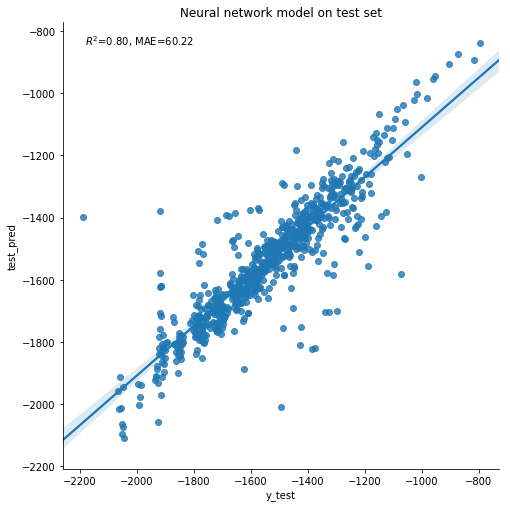

In [24]:

## Plot results

pos = list(range(2))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos,[krr_errors['valid']['mae'], krr_errors['valid']['mae']],width,alpha=0.5, label='mae')
plt.bar([p + 1*width for p in pos], [np.sqrt(krr_errors['valid']['mse']), np.sqrt(krr_errors['valid']['mse'])], width, 
        alpha=0.5, label='mse')

ax.set_title('Error metrics for tested model')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['MAE', 'RMSE'])
ax.set_ylabel('kcal/mol')

plt.legend(['valid', 'test'], loc='upper left')
plt.show()

sns.pairplot(results, x_vars='y_valid', y_vars='valid_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model on validation set")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_valid, valid), 
                                       metrics.mean_absolute_error(y_valid, valid)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

sns.pairplot(results, x_vars='y_test', y_vars='test_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model on test set")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_test, predictions), 
                                       metrics.mean_absolute_error(y_test, predictions)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()


In [25]:
#save the model to disk

filename = 'krr_eig_laplacian_24072019.sav'
joblib.dump(krr_model, open(filename, 'wb'))


## DeepChem Implementation

In [111]:
from deepchem.molnet import load_qm7
from deepchem.models.tensorgraph.optimizers import ExponentialDecay
from sklearn.kernel_ridge import KernelRidge
tf.set_random_seed(123)


## Load function already transforms data by applying normalisation
qm7_tasks, qm7_datasets, qm7_transformers = load_qm7(featurizer='CoulombMatrix', split='stratified', 
                                                      move_mean=True, reload=True)


qm7_train, qm7_valid, qm7_test = qm7_datasets

About to featurize qm7 dataset.
Loading raw samples now.
shard_size: 8192
Reading structures from /var/folders/lt/4hfpdkdn0mzf1tl30rhyncn0g8k1ts/T/gdb7.sdf.
Currently featurizing feature_type: CoulombMatrixEig
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
TIMING: featurizing shard 0 took 5.190 s
TIMING: dataset construction took 6.721 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.
TIMING: dataset construction took 0.028 s
Loading dataset from disk.
TIMING: dataset construction took 0.023 s
Loading dataset from disk.
TIMING: dataset construction took 0.044 s
Loading dataset from disk.
TIMING: dataset construction took 0.011 s
Loading dataset from disk.
TIMING: dataset construction took 0.013 s
Loading dataset from disk.


In [119]:
# Normalisation transformer 
transformer = dc.trans.NormalizationTransformer(transform_X=True, dataset=qm7_train, move_mean=True)

qm7_train_trans = transformer.transform(qm7_train)
qm7_valid_trans = transformer.transform(qm7_valid)
qm7_test_trans = transformer.transform(qm7_test)

print(qm7_train.X[0])
print(qm7_train_trans.X[0])

TIMING: dataset construction took 0.057 s
Loading dataset from disk.
TIMING: dataset construction took 0.013 s
Loading dataset from disk.
TIMING: dataset construction took 0.012 s
Loading dataset from disk.
[50.6315889  24.5130623   0.51904765  0.24554952  0.24078674  0.24077963
  0.16270185  0.16269381  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
[-1.12226156 -3.05140354 -6.16698685 -6.60291008 -7.11202621 -5.18198236
 -2.29257896 -3.03271475 -6.83280039 -5.39099843 -4.15523405 -3.3829503
 -2.43207127 -1.73183033 -1.34366442 -0.95636922 -0.7673162  -0.53073492
 -0.39358878 -0.25161533 -0.15210844 -0.07371589  0.        ]


/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)
/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


In [129]:
## Kernel ridge regression

def krr_model_builder(model_dir):
    sklearn_model = KernelRidge(kernel='laplacian', alpha=0.0001, gamma=0.0001)
    return dc.models.SklearnModel(sklearn_model, model_dir)

krr_model = dc.models.SingletaskToMultitask(qm7_tasks, krr_model_builder)

# Fit trained model
krr_model.fit(qm7_train)
#krr_norm = krr_model.fit(qm7_train_trans)




About to initialize singletask to multitask model
Initializing directory for task u0_atom
About to create task-specific datasets
Splitting multitask dataset into singletask datasets
TIMING: dataset construction took 0.006 s
Loading dataset from disk.
Processing shard 0
	Task u0_atom
Dataset for task u0_atom has shape ((5728, 23), (5728, 1), (5728, 1), (5728,))
Fitting model for task u0_atom


In [143]:
#save the model to disk

filename = 'krr_eig_laplacian_24072019.sav'
joblib.dump(krr_model, open(filename, 'wb'))



AttributeError: 'SingletaskToMultitask' object has no attribute 'save_to_disk'

computed_metrics: [44.25471925334887]
computed_metrics: [0.8903720365196658]
computed_metrics: [5469.154708622904]
Train scores [kcal/mol]
{'mean_squared_error': 5469.154708622904, 'mean_absolute_error': 44.25471925334887, 'pearson_r2_score': 0.8903720365196658}
computed_metrics: [66.38634669275768]
computed_metrics: [0.7336775001175512]
computed_metrics: [13264.682471338918]
valid scores [kcal/mol]
{'mean_squared_error': 13264.682471338918, 'mean_absolute_error': 66.38634669275768, 'pearson_r2_score': 0.7336775001175512}
computed_metrics: [66.38634669275768]
computed_metrics: [0.7336775001175512]
computed_metrics: [13264.682471338918]
Test scores [kcal/mol]
{'mean_squared_error': 13264.682471338918, 'mean_absolute_error': 66.38634669275768, 'pearson_r2_score': 0.7336775001175512}


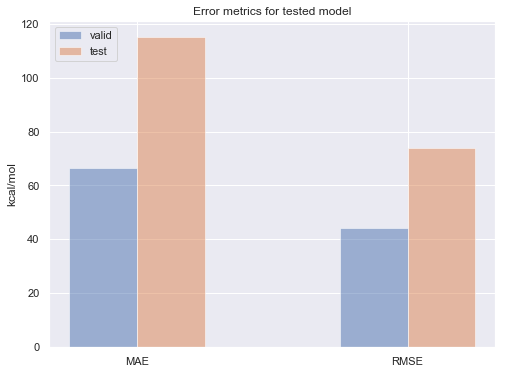

/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


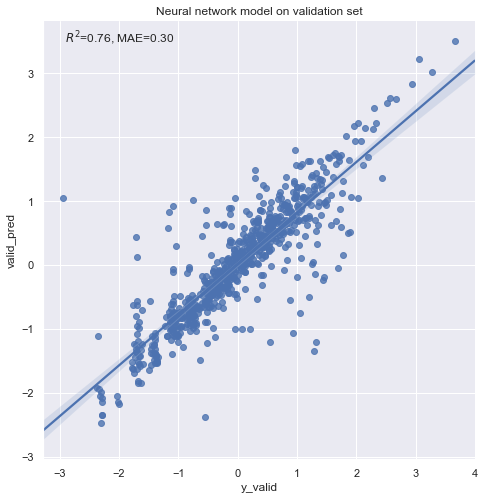

/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


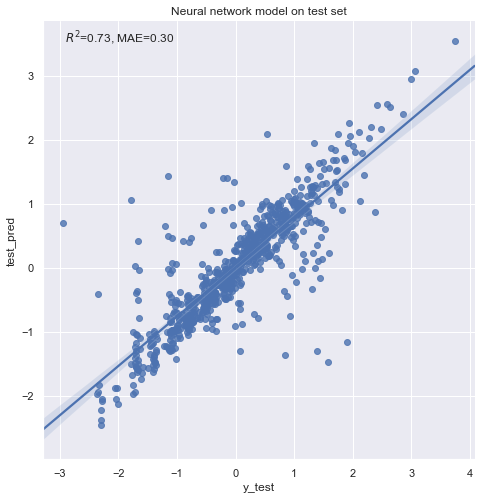

In [138]:
## Evaluate
from sklearn import metrics

#regression_metric = dc.metrics.Metric(dc.metrics.mean_absolute_error, mode="regression")
metric = [
    dc.metrics.Metric(dc.metrics.mean_absolute_error, mode="regression"),
    dc.metrics.Metric(dc.metrics.pearson_r2_score, mode="regression"),
    dc.metrics.Metric(dc.metrics.mean_squared_error, mode="regression")
]

train_evaluator = dc.utils.evaluate.Evaluator(krr_model, qm7_train, qm7_transformers)
train_scores = train_evaluator.compute_model_performance(metric)

print("Train scores [kcal/mol]")
print(train_scores)

valid_evaluator = dc.utils.evaluate.Evaluator(krr_model, qm7_valid, qm7_transformers)
valid_scores = test_evaluator.compute_model_performance(metric)

print("valid scores [kcal/mol]")
print(valid_scores)

test_evaluator = dc.utils.evaluate.Evaluator(krr_model, qm7_test, qm7_transformers)
test_scores = test_evaluator.compute_model_performance(metric)

print("Test scores [kcal/mol]")
print(test_scores)

## Predict

predictions = krr_model.predict(qm7_test)
valid = krr_model.predict(qm7_valid)
results = pd.DataFrame(predictions, columns=['test_pred'])
results['valid_pred'] = valid
results['y_test'] = qm7_test.y
results['y_valid'] = qm7_valid.y

## Plot results

pos = list(range(2))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos,[valid_scores['mean_absolute_error'], train_scores['mean_absolute_error']],width,alpha=0.5, label='mae')
plt.bar([p + 1*width for p in pos], [np.sqrt(valid_scores['mean_squared_error']), np.sqrt(train_scores['mean_squared_error'])], width, 
        alpha=0.5, label='mse')

ax.set_title('Error metrics for tested model')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['MAE', 'RMSE'])
ax.set_ylabel('kcal/mol')

plt.legend(['valid', 'test'], loc='upper left')
plt.show()

sns.pairplot(results, x_vars='y_valid', y_vars='valid_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model on validation set")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(qm7_valid.y, valid), 
                                       metrics.mean_absolute_error(qm7_valid.y, valid)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

sns.pairplot(results, x_vars='y_test', y_vars='test_pred', height=7, aspect=1, kind='reg')
plt.title("Neural network model on test set")
plt.annotate('$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(qm7_test.y, predictions), 
                                       metrics.mean_absolute_error(qm7_test.y, predictions)), 
                                    xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

# fig, ax = plt.subplots(1, 1, figsize=(8,6))
# ax.bar(['train', 'test'], [train_scores['mean_absolute_error'], test_scores['mean_absolute_error']])
# #ax[1].bar(['mae', 'pearsons_r2'], test_scores)
# plt.title("Kernel ridge regression")
# plt.ylabel("mean absolute error")
# plt.show()

## DTNN

In [69]:
# Load QM7 dataset
tasks, datasets, transformers = dc.molnet.load_qm7_from_mat(move_mean=False)
train_dataset, valid_dataset, test_dataset = datasets

# Fit models
metric = [
    dc.metrics.Metric(dc.metrics.mean_absolute_error, mode="regression"),
    dc.metrics.Metric(dc.metrics.pearson_r2_score, mode="regression")
]

# Batch size of models
batch_size = 50
n_embedding = 30
n_distance = 51
distance_min = -1.
distance_max = 9.2
n_hidden = 15
rate = 0.001

model = dc.models.DTNNModel(
    len(tasks),
    n_embedding=n_embedding,
    n_hidden=n_hidden,
    n_distance=n_distance,
    distance_min=distance_min,
    distance_max=distance_max,
    output_activation=False,
    batch_size=batch_size,
    learning_rate=rate,
    use_queue=False,
    mode="regression")

# Fit trained model
model.fit(train_dataset, nb_epoch=50)

train_scores = model.evaluate(train_dataset, metric, transformers)
valid_scores = model.evaluate(valid_dataset, metric, transformers)

TIMING: dataset construction took 0.324 s
Loading dataset from disk.
TIMING: dataset construction took 0.285 s
Loading dataset from disk.
TIMING: dataset construction took 0.131 s
Loading dataset from disk.
TIMING: dataset construction took 0.115 s
Loading dataset from disk.
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/nathalie.willems/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/nathalie.willems/anaconda3/envs/deepche

Ending global_step 999: Average loss 0.170004
Ending global_step 1999: Average loss 0.0085636
Ending global_step 2999: Average loss 0.00423588
Ending global_step 3999: Average loss 0.00336433
Ending global_step 4999: Average loss 0.00283679
Ending global_step 5750: Average loss 0.00189303
Instructions for updating:
Use standard file APIs to delete files with this prefix.
TIMING: model fitting took 224.006 s
computed_metrics: [10.155086]
computed_metrics: [0.998986262829149]
computed_metrics: [10.272173]
computed_metrics: [0.9988002801300446]


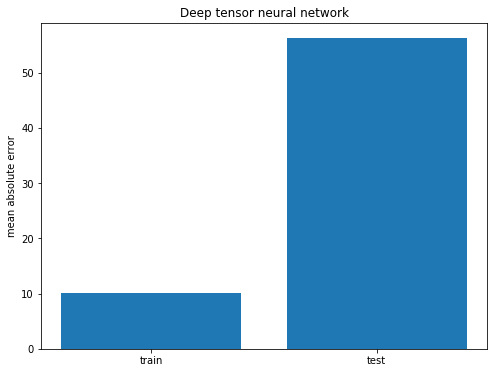

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.bar(['train', 'test'], [train_scores['mean_absolute_error'], test_scores['mean_absolute_error']])
#ax[1].bar(['mae', 'pearsons_r2'], test_scores)
plt.title("Deep tensor neural network")
plt.ylabel("mean absolute error")
plt.show()

## Single task NN 

In [ ]:
from deepchem.molnet import load_qm7_from_mat
from deepchem.models.tensorgraph.optimizers import ExponentialDecay

print(tf.__version__)

qm7_tasks, datasets, transformers = load_qm7_from_mat(
    split='stratified', move_mean=True, reload=False)


qm_train, qm_valid, qm_test = datasets

fit_transformers = [dc.trans.CoulombFitTransformer(qm_train)]

rate = 0.001
dc_model = dc.models.MultitaskFitTransformRegressor(
    n_tasks=1,
    n_features=[23, 23],
    learning_rate=rate,
    momentum=.8,
    batch_size=25,
    weight_init_stddevs=[1 / np.sqrt(400), 1 / np.sqrt(100), 1 / np.sqrt(100)],
    bias_init_consts=[0., 0., 0.],
    layer_sizes=[400, 100, 100],
    dropouts=[0.01, 0.01, 0.01],
    fit_transformers=fit_transformers,
    n_evals=10,
    seed=123)




In [ ]:
# Fit trained model
dc_model.fit(qm_train, nb_epoch=50)

train_scores = dc_model.evaluate(qm_train, metric, transformers)
valid_scores = dc_model.evaluate(qm_valid, metric, transformers)